In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
location = r"C:\Users\coop\Downloads\archive\Churn_Modelling.csv"
ds = pd.read_csv(location)


In [76]:
ds = ds.drop(columns= ['RowNumber','CustomerId', 'Surname'])


In [77]:
ds = pd.get_dummies(data = ds, drop_first=True)

<Axes: ylabel='Frequency'>

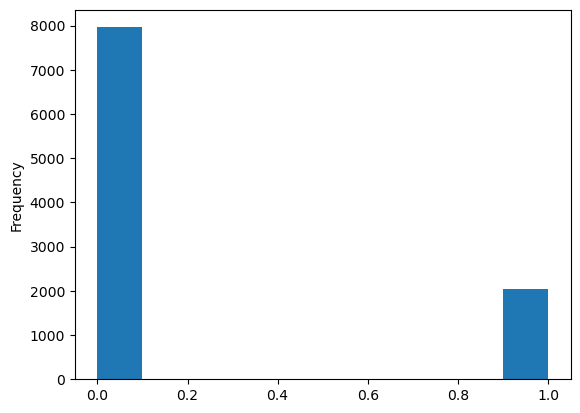

In [78]:
ds.Exited.plot.hist()

In [79]:
X = ds.drop(columns = ['Exited'])
y = ds['Exited']

<Axes: title={'center': 'corralation with Exited'}>

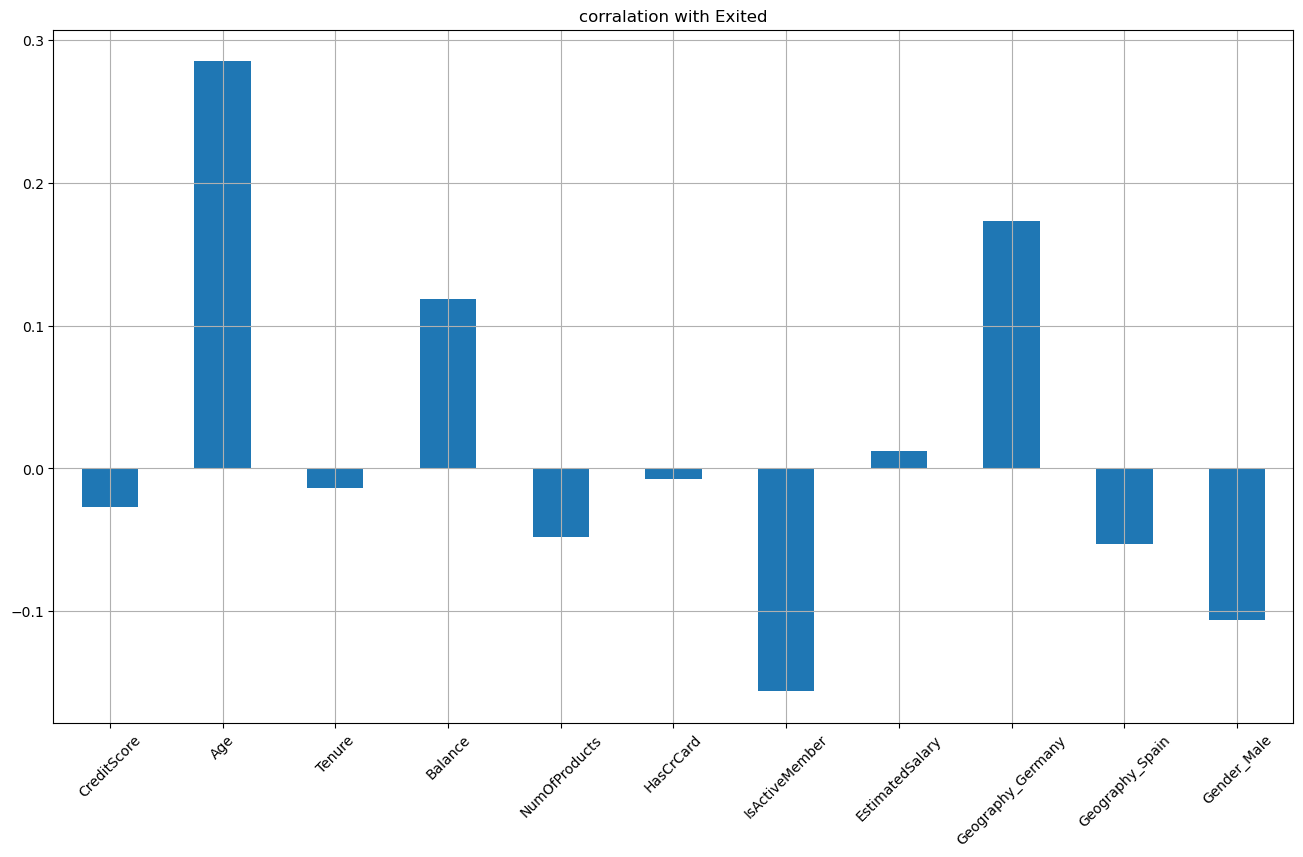

In [80]:
X.corrwith(y).plot.bar(figsize= (16,9), rot = 45, title="corralation with Exited", grid = True)

In [82]:
corr = ds.corr()

<Axes: >

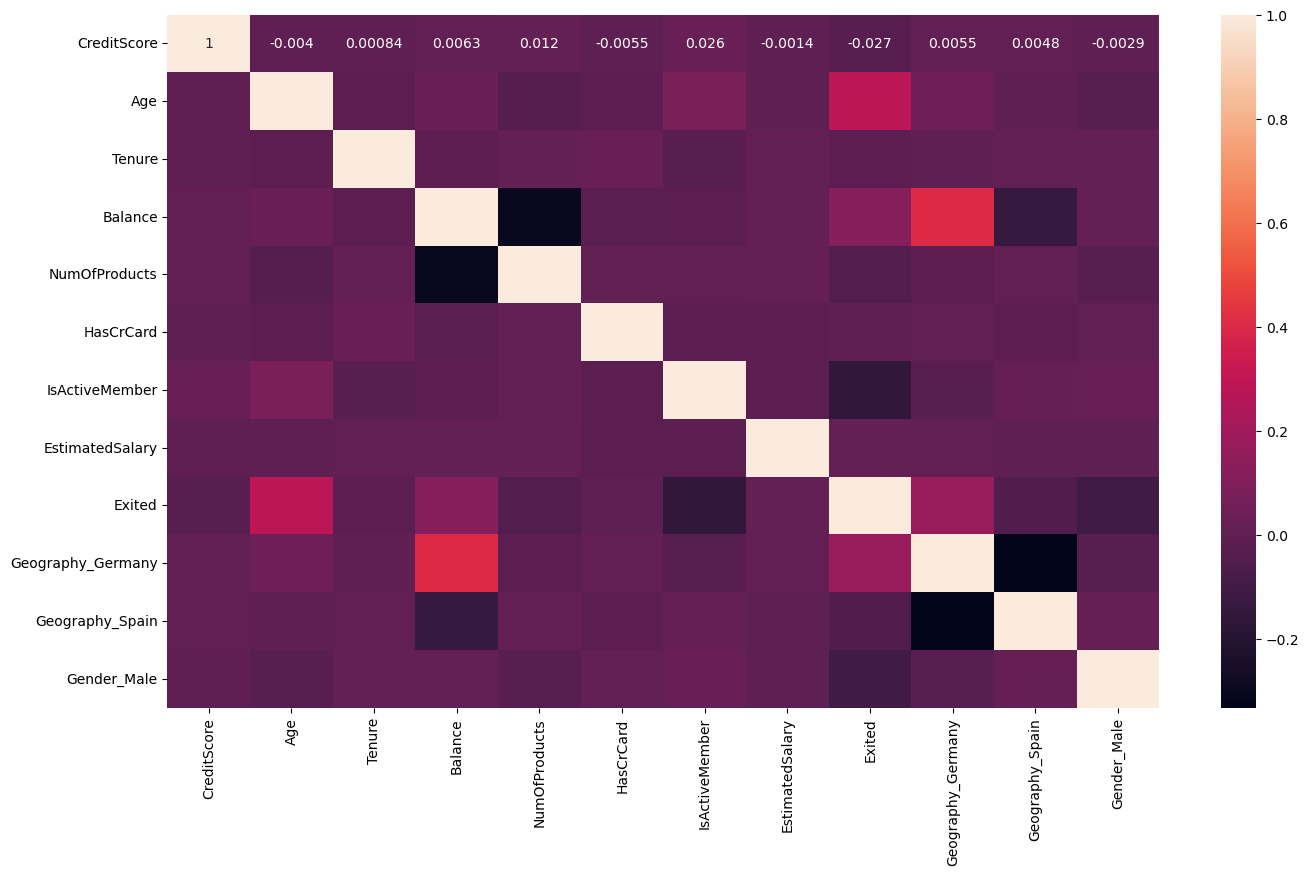

In [83]:
plt.figure(figsize =(16,9))
sns.heatmap(corr, annot= True)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 25)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
# LemmiT
# user: YosiyasT
#passward : YosiyasT@789
#11.10.1.130.29/seal

In [2]:
filoc = r"C:\Users\coop\Downloads\archive\Churn_Modelling.csv"
dataset = pd.read_csv(filoc)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [63]:
dataset = dataset.drop(columns = ['Surname', 'RowNumber','CustomerId'])

In [64]:
dataset= pd.get_dummies(data=dataset,drop_first=True)

In [58]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: ylabel='Frequency'>

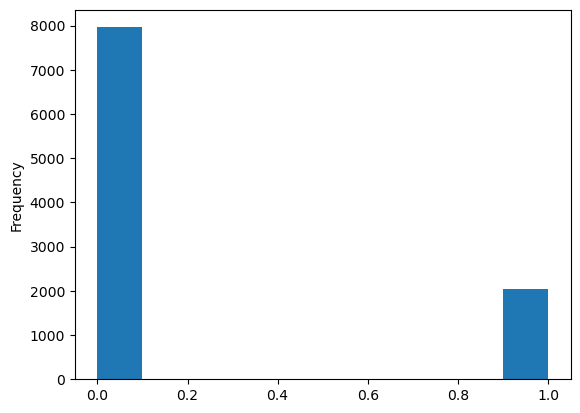

In [36]:
dataset.Exited.plot.hist()

In [1]:
!pip install cx_Oracle

     ---------------------------------------- 0.0/363.9 kB ? eta -:--:--
     -- ---------------------------------- 20.5/363.9 kB 330.3 kB/s eta 0:00:02
     --- --------------------------------- 30.7/363.9 kB 262.6 kB/s eta 0:00:02
     ----- ------------------------------- 51.2/363.9 kB 327.7 kB/s eta 0:00:01
     ------- ----------------------------- 71.7/363.9 kB 357.2 kB/s eta 0:00:01
     -------------- --------------------- 143.4/363.9 kB 607.9 kB/s eta 0:00:01
     -------------------- --------------- 204.8/363.9 kB 731.4 kB/s eta 0:00:01
     ------------------------------- ---- 317.4/363.9 kB 981.5 kB/s eta 0:00:01
     ------------------------------------ 363.9/363.9 kB 985.1 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (py

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [8 lines of output]
  <string>:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  C:\Users\coop\AppData\Local\Temp\pip-build-env-i1pkj07i\overlay\Lib\site-packages\setuptools\config\expand.py:133: SetuptoolsWarning: File 'C:\\Users\\coop\\AppData\\Local\\Temp\\pip-install-u7nduhkh\\cx-oracle_86031f87379a4e24bfcb52af7130cd41\\README.md' cannot be found
    return '\n'.join(
  running bdist_wheel
  running build
  running build_ext
  building 'cx_Oracle' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cx_Oracle
ERROR: Could not build wheels for cx_Oracle, which is required to install pyproject.tom

In [37]:
dataset2 = dataset.drop(columns = ['Exited'])
dataset2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


<Axes: title={'center': 'correlated with exited column'}>

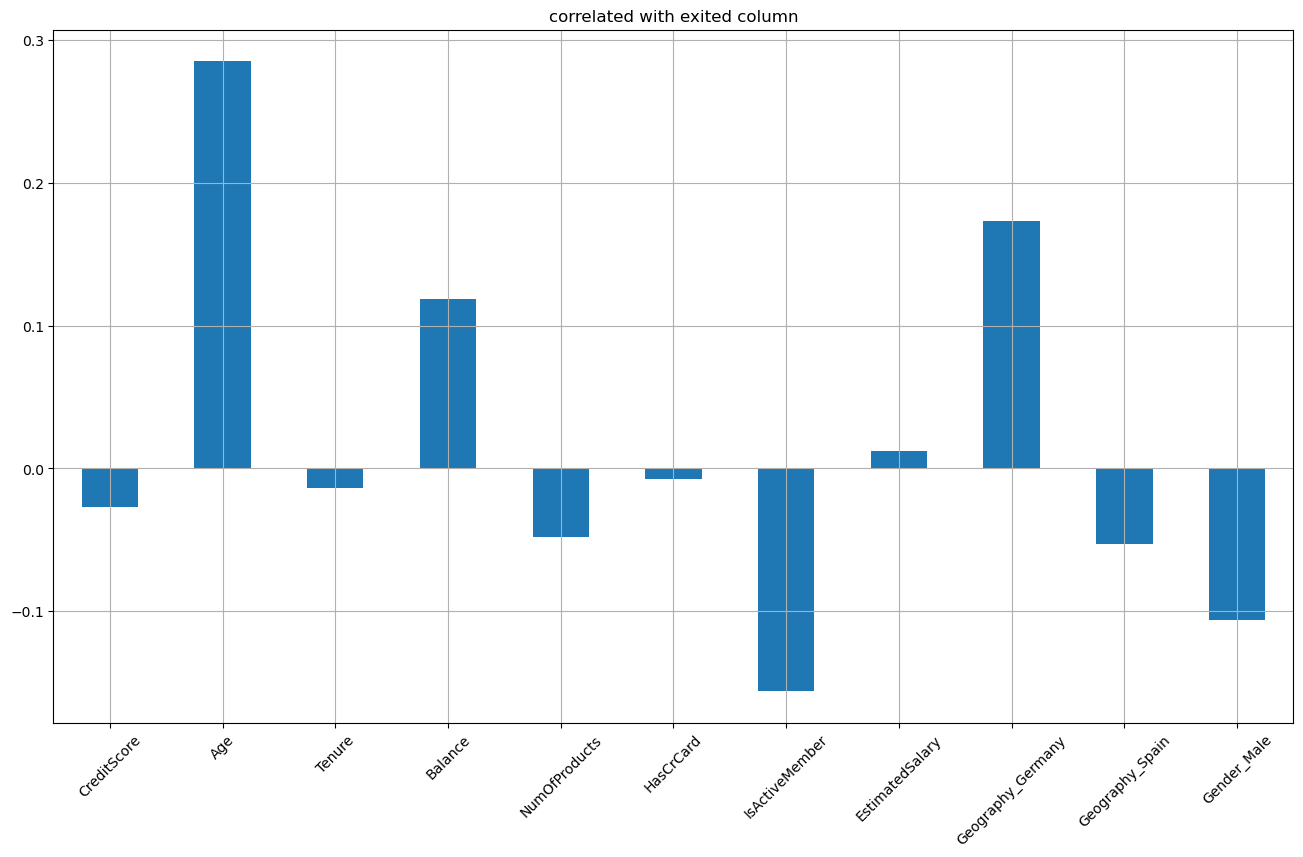

In [44]:
dataset2.corrwith(dataset['Exited']).plot.bar(figsize=(16,9), title = "correlated with exited column" ,rot = 45,grid = True)

In [65]:
corr = dataset.corr()

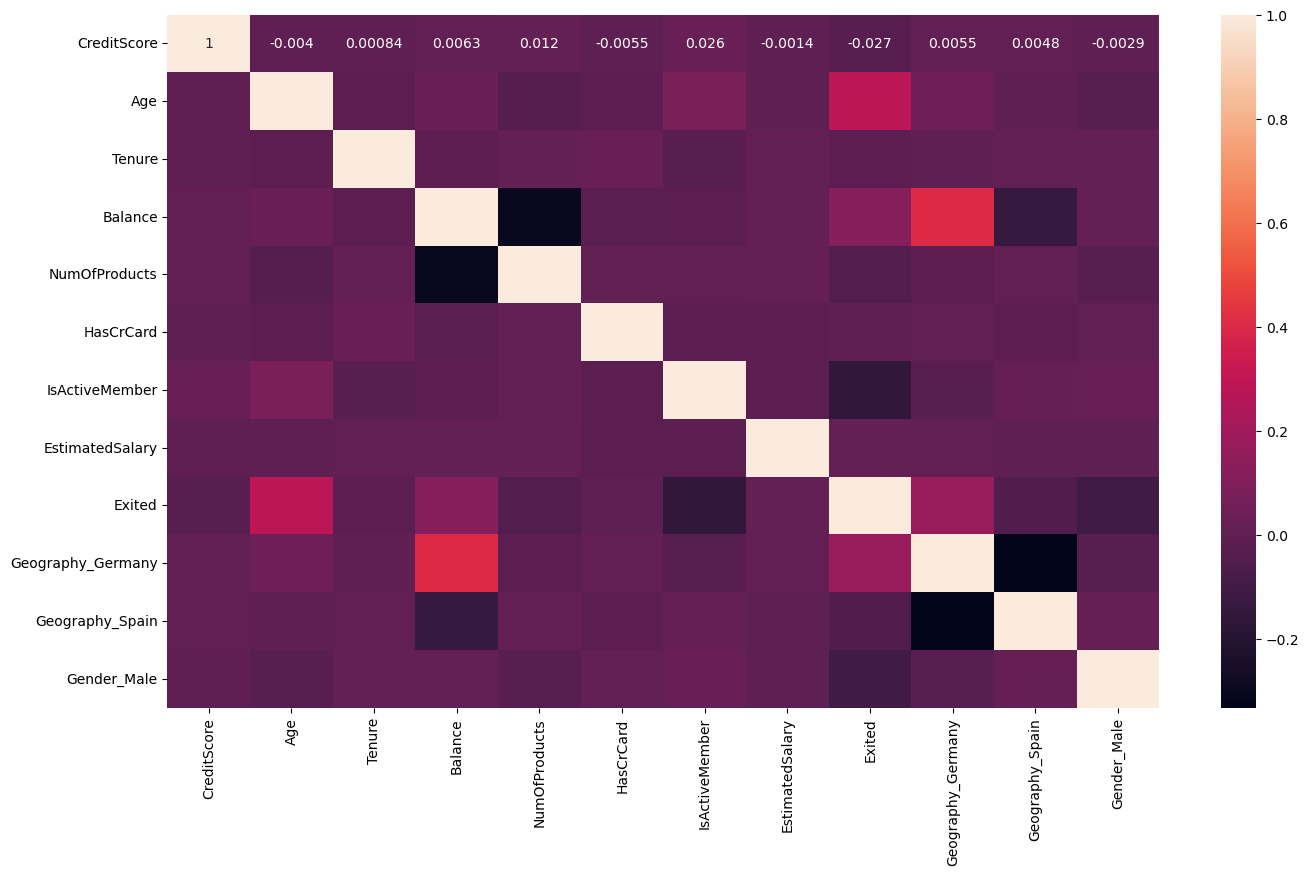

In [90]:
plt. figure(figsize = (16,9))
sns.heatmap(corr, annot = True)

In [70]:
X = dataset.drop(columns = 'Exited')
y = dataset['Exited']

In [24]:
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [19]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=0)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trian= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [82]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0).fit(X_train , y_train)

In [85]:
y_pred = clf.predict(X_test)

C:\Users\coop\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [88]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [89]:
results=pd.DataFrame([['Logistic regression',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.6645,0.47455,0.347477,0.748148
